In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/spotify_tracks.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [3]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','bool','category']).columns

numeric_cols, categorical_cols


(Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
       dtype='object'),
 Index(['track_id', 'artists', 'album_name', 'track_name', 'explicit',
        'track_genre'],
       dtype='object'))

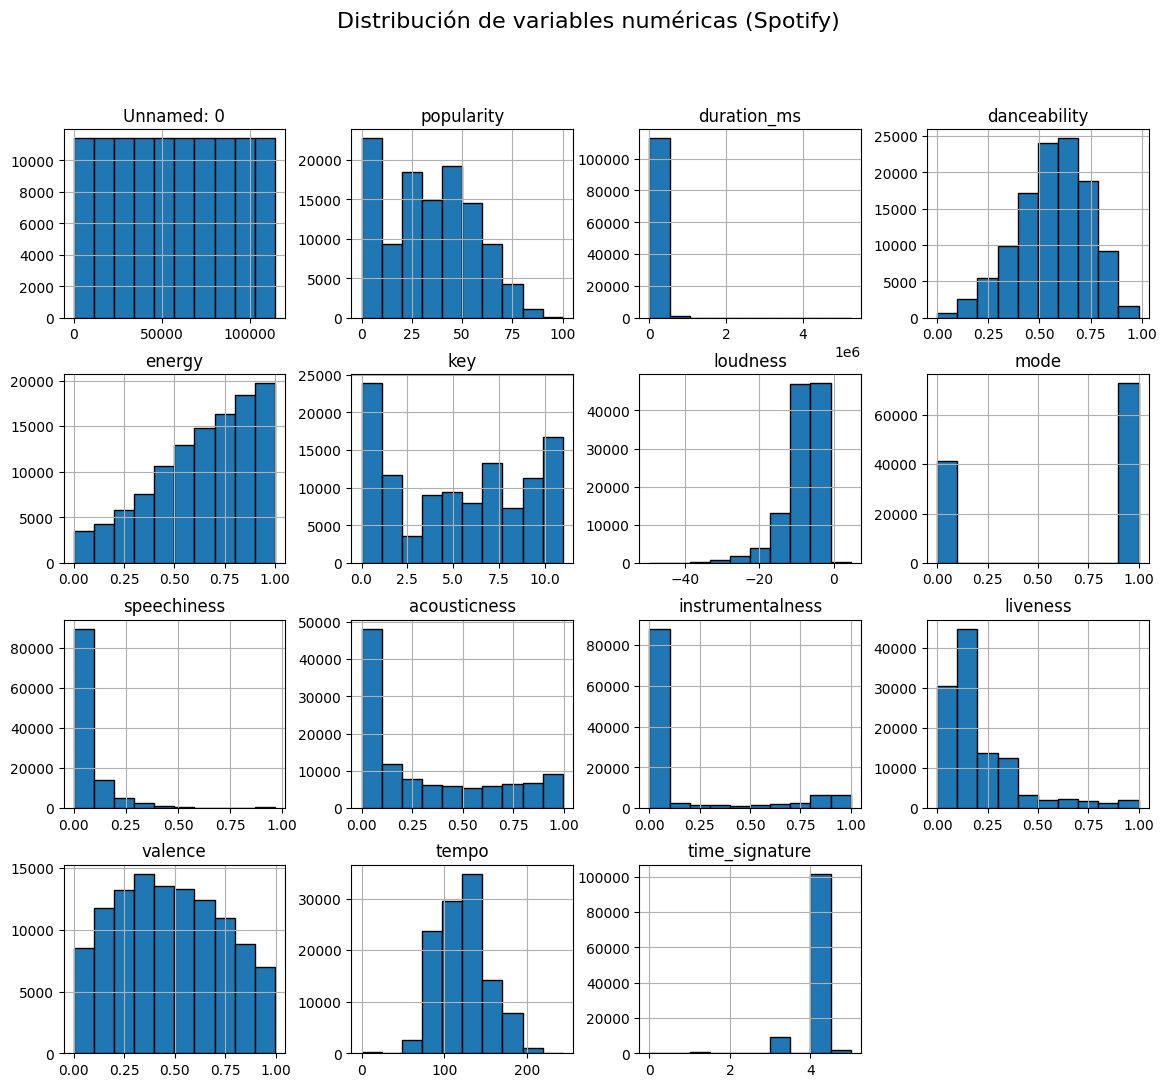

In [4]:
df[numeric_cols].hist(figsize=(14,12), edgecolor="black")
plt.suptitle("Distribución de variables numéricas (Spotify)", fontsize=16)
plt.savefig("../images/histograma_variables_numericas.png", dpi=300, bbox_inches="tight")
plt.show()


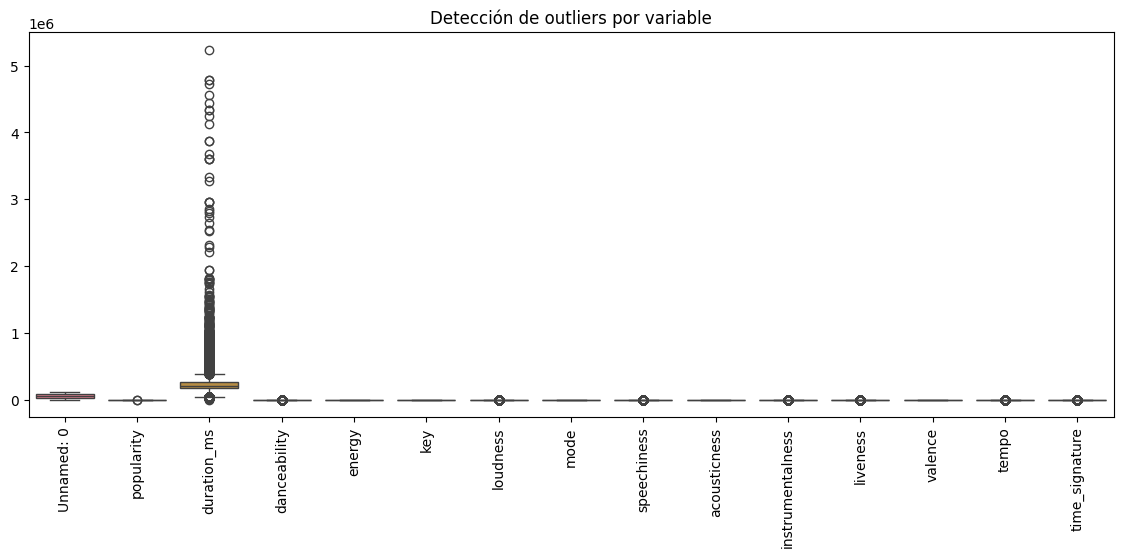

In [5]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Detección de outliers por variable")
plt.savefig("../images/boxplot_outliers.png", dpi=300, bbox_inches="tight")
plt.show()


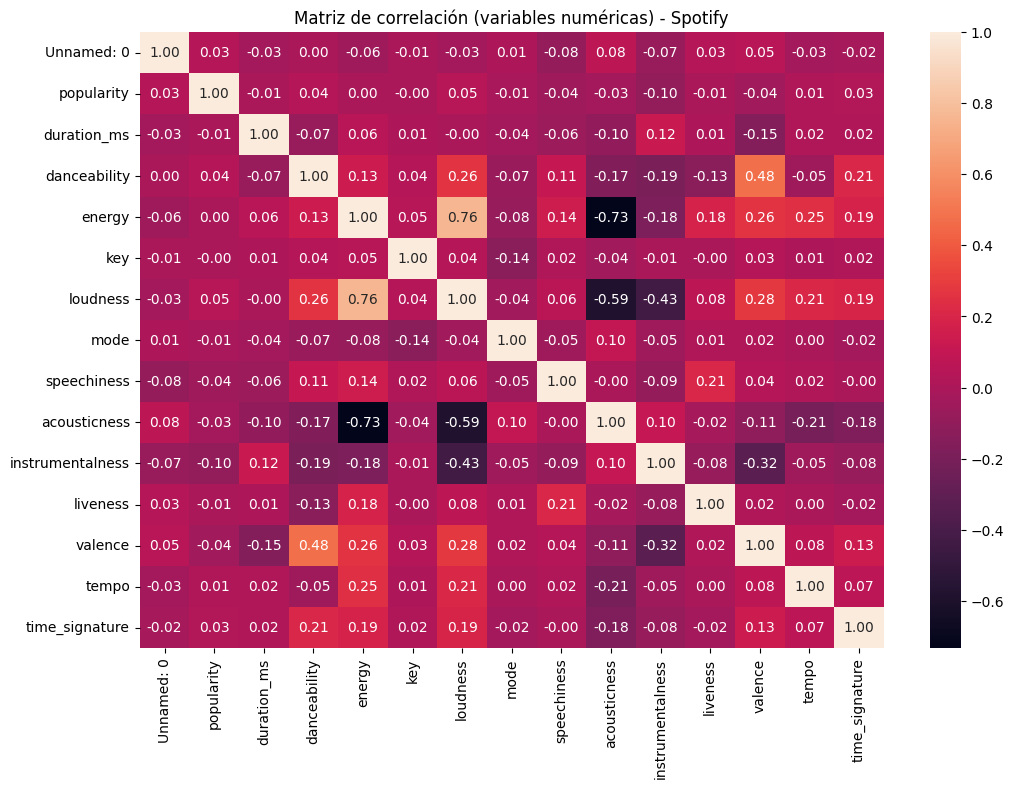

In [6]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de correlación (variables numéricas) - Spotify")
plt.savefig("../images/matriz_correlacion.png", dpi=300, bbox_inches="tight")
plt.show()
